In [39]:
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

import geopy

import matplotlib.pyplot as plt
import seaborn as sns

# Configure image format to be ‘svg’
%config InlineBackend.figure_format = 'svg'

# allow visuals to render within notebook
%matplotlib inline 

In [40]:
# Make some room to see stuff (i.e. drop display limits on Pandas rows & cols - be careful w/ big df's!)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Import MTA Data From SQLite Database

In [41]:
engine = create_engine('sqlite:///../_PROJECT/mta_data.db')

engine.table_names()

/var/folders/16/my2sdbrn4hvfl3_91fx0wj9c0000gn/T/ipykernel_12807/152434287.py:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['mta_data']

In [42]:
# Check for any NULL values

pd.read_sql('''
            SELECT *
            FROM mta_data
            WHERE unit IS NULL 
               OR scp IS NULL
               OR station IS NULL
               OR linename IS NULL
               OR date IS NULL
               OR time IS NULL
               OR desc IS NULL
               OR entries IS NULL
               OR exits IS NULL;
            ''', con=engine)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


In [43]:
# Bring in just the data for May-June 2019 (order by ascending 'DATE'; don't bother importing 'EXITS' col)

# df_2019 = pd.read_sql('''
#                       SELECT (STATION || ' - ' || LINENAME || ' - ' || DIVISION) AS STATION_ID,
#                          STATION AS STATION_NAME, [C/A], UNIT, SCP,  DATE, TIME, DESC, ENTRIES
#                       FROM mta_data
#                       WHERE DATE = '04/30/2019' OR DATE LIKE '05%19' OR DATE LIKE '06%19'
#                       ORDER BY DATE ASC;
#                       ''', con=engine)

df_2019 = pd.read_sql('''
                      SELECT *
                      FROM mta_data
                      WHERE DATE = '04/30/2019' OR DATE LIKE '05%19' OR DATE LIKE '06%19'
                      ORDER BY DATE ASC;
                      ''', con=engine)

In [44]:
# Add a 'DATETIME' column (and drop 'DATE' & 'TIME' - can get either of these from 'DATETIME' if needed)

df_2019['DATETIME'] = pd.to_datetime(df_2019['DATE'] + ' ' + df_2019['TIME'])
df_2019.drop(columns=['DATE', 'TIME', 'EXITS'], inplace=True)

In [45]:
print(df_2019.shape)
display(df_2019.head())
display(df_2019.tail())

(3639340, 9)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7038242,2019-04-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7038261,2019-04-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7038308,2019-04-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7038474,2019-04-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7038775,2019-04-30 16:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,DATETIME
3639335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 05:00:00
3639336,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 09:00:00
3639337,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 13:00:00
3639338,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 17:00:00
3639339,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 21:00:00


In [46]:
# Bring in just the data for May-June 2021 (order by ascending 'DATE'; don't bother importing 'EXITS' col)

# df_2021 = pd.read_sql('''
#                       SELECT (STATION || ' - ' || LINENAME || ' - ' || DIVISION) AS STATION_ID,
#                          STATION AS STATION_NAME, [C/A], UNIT, SCP,  DATE, TIME, DESC, ENTRIES
#                       FROM mta_data
#                       WHERE DATE = '04/30/2021' OR DATE LIKE '05%21' OR DATE LIKE '06%21'
#                       ORDER BY DATE ASC;
#                       ''', con=engine)

df_2021 = pd.read_sql('''
                      SELECT *
                      FROM mta_data
                      WHERE DATE = '04/30/2021' OR DATE LIKE '05%21' OR DATE LIKE '06%21'
                      ORDER BY DATE ASC;
                      ''', con=engine)

In [47]:
# Add a 'DATETIME' column (and drop 'DATE' & 'TIME' - can get either of these from 'DATETIME' if needed)

df_2021['DATETIME'] = pd.to_datetime(df_2021['DATE'] + ' ' + df_2021['TIME'])
df_2021.drop(columns=['DATE', 'TIME'], inplace=True)

In [48]:
print(df_2021.shape)
display(df_2021.head())
display(df_2021.tail())

(3706606, 10)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7564048,2584088,2021-04-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7564059,2584092,2021-04-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7564073,2584149,2021-04-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7564118,2584275,2021-04-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7564286,2584326,2021-04-30 16:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME
3706601,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,584,2021-06-30 05:00:00
3706602,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,584,2021-06-30 09:00:00
3706603,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,584,2021-06-30 13:00:00
3706604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,584,2021-06-30 17:00:00
3706605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,584,2021-06-30 21:00:00


# 2. Basic Cleaning

### 2a) Check for Duplicates

#### Start with df_2019:

In [49]:
check = df_2019.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'])['ENTRIES'] \
                        .count().sort_values(ascending=False)
check.reset_index().head()

,C/A,UNIT,SCP,STATION,LINENAME,DATETIME,ENTRIES
0,R249,R179,01-05-00,86 ST,456,2019-06-27 00:00:00,4
1,N045,R187,01-06-00,81 ST-MUSEUM,BC,2019-06-02 17:00:00,4
2,R174,R034,00-00-03,125 ST,1,2019-06-08 00:00:00,4
3,N045,R187,01-00-00,81 ST-MUSEUM,BC,2019-06-02 17:00:00,4
4,R174,R034,00-00-02,125 ST,1,2019-06-08 00:00:00,4


In [50]:
for i in range(0, 6):
    display(df_2019[(df_2019['C/A'] == check.reset_index().iloc[i, 0:1].values[0]) & 
                    (df_2019['UNIT'] == check.reset_index().iloc[i, 1:2].values[0]) &
                    (df_2019['SCP'] == check.reset_index().iloc[i, 2:3].values[0]) &
                    (df_2019['STATION'] == check.reset_index().iloc[i, 3:4].values[0]) &
                    (df_2019['LINENAME'] == check.reset_index().iloc[i, 4:5].values[0]) &
                    (df_2019['DATETIME'] == check.reset_index().iloc[i, 5:6].values[0])])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,DATETIME
3427686,R249,R179,01-05-00,86 ST,456,IRT,REGULAR,6,2019-06-27
3427687,R249,R179,01-05-00,86 ST,456,IRT,RECOVR AUD,11,2019-06-27
3457150,R249,R179,01-05-00,86 ST,456,IRT,REGULAR,6,2019-06-27
3457151,R249,R179,01-05-00,86 ST,456,IRT,RECOVR AUD,11,2019-06-27


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,DATETIME
1940800,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,REGULAR,2254050,2019-06-02 17:00:00
1940801,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,RECOVR AUD,2254049,2019-06-02 17:00:00
1969768,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,REGULAR,2254050,2019-06-02 17:00:00
1969769,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,RECOVR AUD,2254049,2019-06-02 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,DATETIME
2306436,R174,R034,00-00-03,125 ST,1,IRT,REGULAR,3828801,2019-06-08
2306437,R174,R034,00-00-03,125 ST,1,IRT,RECOVR AUD,3828804,2019-06-08
2335466,R174,R034,00-00-03,125 ST,1,IRT,REGULAR,3828801,2019-06-08
2335467,R174,R034,00-00-03,125 ST,1,IRT,RECOVR AUD,3828804,2019-06-08


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,DATETIME
1940782,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,REGULAR,5254570,2019-06-02 17:00:00
1940783,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,RECOVR AUD,5254568,2019-06-02 17:00:00
1969750,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,REGULAR,5254570,2019-06-02 17:00:00
1969751,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,RECOVR AUD,5254568,2019-06-02 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,DATETIME
2306430,R174,R034,00-00-02,125 ST,1,IRT,REGULAR,6091547,2019-06-08
2306431,R174,R034,00-00-02,125 ST,1,IRT,RECOVR AUD,6091548,2019-06-08
2335460,R174,R034,00-00-02,125 ST,1,IRT,REGULAR,6091547,2019-06-08
2335461,R174,R034,00-00-02,125 ST,1,IRT,RECOVR AUD,6091548,2019-06-08


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,DATETIME
2467844,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,REGULAR,2258033,2019-06-11 21:00:00
2467845,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,RECOVR AUD,2258031,2019-06-11 21:00:00
2496957,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,REGULAR,2258033,2019-06-11 21:00:00
2496958,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,RECOVR AUD,2258031,2019-06-11 21:00:00


#### Looks like accidental data duplication and some RECOV AUDs virtually identical to REGULARs; will just drop all the duplicates

In [51]:
print(df_2019.shape)

df_2019 = df_2019.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'], ascending=False) \
                             .drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'])

df_2019.reset_index(drop=True, inplace=True)
print(df_2019.shape)

(3639340, 9)
(1819646, 9)


In [52]:
# Re-check for duplicates

check = df_2019.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'])['ENTRIES'] \
                        .count().sort_values(ascending=False)
check.reset_index().head()

,C/A,UNIT,SCP,STATION,LINENAME,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,2019-04-30 00:00:00,1
1,R142,R293,01-00-01,34 ST-PENN STA,123ACE,2019-05-12 18:00:00,1
2,R142,R293,01-00-01,34 ST-PENN STA,123ACE,2019-05-14 06:00:00,1
3,R142,R293,01-00-01,34 ST-PENN STA,123ACE,2019-05-14 02:00:00,1
4,R142,R293,01-00-01,34 ST-PENN STA,123ACE,2019-05-13 22:00:00,1


#### Now deal with duplicates in df_2021:

In [53]:
check = df_2021.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'])['ENTRIES'] \
                         .count().sort_values(ascending=False)
check.reset_index().head()

,C/A,UNIT,SCP,STATION,LINENAME,DATETIME,ENTRIES
0,B024,R211,00-05-00,KINGS HWY,BQ,2021-05-02 12:00:00,4
1,B024,R211,00-05-00,KINGS HWY,BQ,2021-05-05 12:00:00,4
2,N329,R201,00-03-02,WOODHAVEN BLVD,MR,2021-05-08 05:00:00,4
3,N329,R201,00-03-02,WOODHAVEN BLVD,MR,2021-05-08 01:00:00,4
4,N335,R158,01-00-03,KEW GARDENS,EF,2021-06-20 18:30:00,4


In [54]:
for i in range(0, 6):
    display(df_2021[(df_2021['C/A'] == check.reset_index().iloc[i, 0:1].values[0]) & 
                    (df_2021['UNIT'] == check.reset_index().iloc[i, 1:2].values[0]) &
                    (df_2021['SCP'] == check.reset_index().iloc[i, 2:3].values[0]) &
                    (df_2021['STATION'] == check.reset_index().iloc[i, 3:4].values[0]) &
                    (df_2021['LINENAME'] == check.reset_index().iloc[i, 4:5].values[0]) &
                    (df_2021['DATETIME'] == check.reset_index().iloc[i, 5:6].values[0])])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME
121785,B024,R211,00-05-00,KINGS HWY,BQ,BMT,REGULAR,262152,0,2021-05-02 12:00:00
121786,B024,R211,00-05-00,KINGS HWY,BQ,BMT,RECOVR AUD,13,0,2021-05-02 12:00:00
151574,B024,R211,00-05-00,KINGS HWY,BQ,BMT,REGULAR,262152,0,2021-05-02 12:00:00
151575,B024,R211,00-05-00,KINGS HWY,BQ,BMT,RECOVR AUD,13,0,2021-05-02 12:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME
301051,B024,R211,00-05-00,KINGS HWY,BQ,BMT,REGULAR,262152,0,2021-05-05 12:00:00
301052,B024,R211,00-05-00,KINGS HWY,BQ,BMT,RECOVR AUD,21,0,2021-05-05 12:00:00
330870,B024,R211,00-05-00,KINGS HWY,BQ,BMT,REGULAR,262152,0,2021-05-05 12:00:00
330871,B024,R211,00-05-00,KINGS HWY,BQ,BMT,RECOVR AUD,21,0,2021-05-05 12:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME
490387,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,REGULAR,4825280,5534700,2021-05-08 05:00:00
490388,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,RECOVR AUD,12538860,12056522,2021-05-08 05:00:00
520213,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,REGULAR,4825280,5534700,2021-05-08 05:00:00
520214,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,RECOVR AUD,12538860,12056522,2021-05-08 05:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME
490385,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,REGULAR,4825276,5534671,2021-05-08 01:00:00
490386,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,RECOVR AUD,12538859,12056519,2021-05-08 01:00:00
520211,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,REGULAR,4825276,5534671,2021-05-08 01:00:00
520212,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,RECOVR AUD,12538859,12056519,2021-05-08 01:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME
3061698,N335,R158,01-00-03,KEW GARDENS,EF,IND,REGULAR,5201958,17258849,2021-06-20 18:30:00
3061699,N335,R158,01-00-03,KEW GARDENS,EF,IND,RECOVR AUD,5201960,17258853,2021-06-20 18:30:00
3091640,N335,R158,01-00-03,KEW GARDENS,EF,IND,REGULAR,5201958,17258849,2021-06-20 18:30:00
3091641,N335,R158,01-00-03,KEW GARDENS,EF,IND,RECOVR AUD,5201960,17258853,2021-06-20 18:30:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME
181380,B024,R211,00-05-00,KINGS HWY,BQ,BMT,REGULAR,262152,0,2021-05-03 20:00:00
181381,B024,R211,00-05-00,KINGS HWY,BQ,BMT,RECOVR AUD,16,0,2021-05-03 20:00:00
211194,B024,R211,00-05-00,KINGS HWY,BQ,BMT,REGULAR,262152,0,2021-05-03 20:00:00
211195,B024,R211,00-05-00,KINGS HWY,BQ,BMT,RECOVR AUD,16,0,2021-05-03 20:00:00


#### Looks like a similar situation as with df_2019; some RECOVR AUDs look like trivial tests of some sort; will just drop the duplicates

In [55]:
print(df_2021.shape)

df_2021 = df_2021.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'], ascending=False) \
                             .drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'])

df_2021.reset_index(drop=True, inplace=True)
print(df_2021.shape)

(3706606, 10)
(1853257, 10)


In [56]:
# Re-check for duplicates

check = df_2021.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'])['ENTRIES'] \
                         .count().sort_values(ascending=False)
check.reset_index().head()

,C/A,UNIT,SCP,STATION,LINENAME,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,2021-04-30 00:00:00,1
1,R138,R293,00-03-04,34 ST-PENN STA,123ACE,2021-05-08 22:00:00,1
2,R138,R293,00-03-04,34 ST-PENN STA,123ACE,2021-05-13 06:00:00,1
3,R138,R293,00-03-04,34 ST-PENN STA,123ACE,2021-05-13 02:00:00,1
4,R138,R293,00-03-04,34 ST-PENN STA,123ACE,2021-05-12 22:00:00,1


### 2b) Find Net Daily Entries (Based on Last ENTRIES per Day)

In [57]:
# Will be useful to add back 'DATE' column (formatted properly this time)

df_2019['DATE'] = df_2019['DATETIME'].dt.date
df_2021['DATE'] = df_2021['DATETIME'].dt.date

In [73]:
df_2019.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,DATETIME,DATE
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 21:00:00,2019-06-30
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 17:00:00,2019-06-30
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 13:00:00,2019-06-30
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 09:00:00,2019-06-30
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 05:00:00,2019-06-30


#### Sort the data in descending time per day per turnstile

In [74]:
df_2019.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], 
                          inplace=True, ascending=False)
df_2019.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,DATETIME,DATE
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 21:00:00,2019-06-30
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 17:00:00,2019-06-30
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 13:00:00,2019-06-30
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 09:00:00,2019-06-30
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 05:00:00,2019-06-30
5,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-30 01:00:00,2019-06-30
6,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-29 21:00:00,2019-06-29
7,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-29 17:00:00,2019-06-29
8,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-29 13:00:00,2019-06-29
9,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,2019-06-29 09:00:00,2019-06-29


In [75]:
# Recall that dataframe is already sorted with last count of day appearing first in each group

daily_entries_2019 = df_2019.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE'])[['ENTRIES', 'DATETIME']] \
                                      .first().reset_index()
daily_entries_2019.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,2019-04-30,7039520,2019-04-30 20:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,2019-05-01,7041075,2019-05-01 20:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,2019-05-02,7042630,2019-05-02 20:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,2019-05-03,7044206,2019-05-03 20:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,2019-05-04,7045028,2019-05-04 20:00:00


In [76]:
daily_entries_2021 = df_2021.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE'])['ENTRIES'] \
                                      .first().reset_index()
daily_entries_2021.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,2021-04-30,7564517
1,A002,R051,02-00-00,59 ST,NQR456W,2021-05-01,7564974
2,A002,R051,02-00-00,59 ST,NQR456W,2021-05-02,7565300
3,A002,R051,02-00-00,59 ST,NQR456W,2021-05-03,7565798
4,A002,R051,02-00-00,59 ST,NQR456W,2021-05-04,7566364


#### Add 'PREV_DAY_ENTRIES' Column

In [77]:
# disable chained assignments - this warning is annoying!
pd.options.mode.chained_assignment = None

daily_entries_2019['PREV_DAY_ENTRIES'] = daily_entries_2019['ENTRIES'].shift(1)

# Drop NaNs associated with 04/30/2019 rows and covert the new column to integer
print(daily_entries_2019.shape)
# Redundant use of pd.to_datetime() avoids annoying Pandas FutureWarning
daily_entries_2019 = \
       daily_entries_2019[~(pd.to_datetime(daily_entries_2019['DATE']) == pd.to_datetime('2019-04-30'))]
daily_entries_2019.reset_index(drop=True, inplace=True)
print(daily_entries_2019.shape)
daily_entries_2019['PREV_DAY_ENTRIES'] = daily_entries_2019['PREV_DAY_ENTRIES'].astype('int')

display(daily_entries_2019.head())
display(daily_entries_2019.tail())

(300475, 9)
(295643, 9)


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,DATETIME,PREV_DAY_ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,2019-05-01,7041075,2019-05-01 20:00:00,7039520
1,A002,R051,02-00-00,59 ST,NQR456W,2019-05-02,7042630,2019-05-02 20:00:00,7041075
2,A002,R051,02-00-00,59 ST,NQR456W,2019-05-03,7044206,2019-05-03 20:00:00,7042630
3,A002,R051,02-00-00,59 ST,NQR456W,2019-05-04,7045028,2019-05-04 20:00:00,7044206
4,A002,R051,02-00-00,59 ST,NQR456W,2019-05-05,7045663,2019-05-05 20:00:00,7045028


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,DATETIME,PREV_DAY_ENTRIES
295638,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-26,5554,2019-06-26 21:00:00,5554
295639,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-27,5554,2019-06-27 21:00:00,5554
295640,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-28,5554,2019-06-28 21:00:00,5554
295641,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-29,5554,2019-06-29 21:00:00,5554
295642,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-30,5554,2019-06-30 21:00:00,5554


In [78]:
daily_entries_2021['PREV_DAY_ENTRIES'] = daily_entries_2021['ENTRIES'].shift(1)

# Drop NaNs associated with 04/30/2021 rows and covert the new column to integer
print(daily_entries_2021.shape)
# Redundant use of pd.to_datetime() avoids annoying Pandas FutureWarning
daily_entries_2021 = \
       daily_entries_2021[~(pd.to_datetime(daily_entries_2021['DATE']) == pd.to_datetime('2021-04-30'))]
daily_entries_2021.reset_index(drop=True, inplace=True)
print(daily_entries_2021.shape)
daily_entries_2021['PREV_DAY_ENTRIES'] = daily_entries_2021['PREV_DAY_ENTRIES'].astype('int')

display(daily_entries_2021.head())
display(daily_entries_2021.tail())

(309514, 8)
(304524, 8)


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,2021-05-01,7564974,7564517
1,A002,R051,02-00-00,59 ST,NQR456W,2021-05-02,7565300,7564974
2,A002,R051,02-00-00,59 ST,NQR456W,2021-05-03,7565798,7565300
3,A002,R051,02-00-00,59 ST,NQR456W,2021-05-04,7566364,7565798
4,A002,R051,02-00-00,59 ST,NQR456W,2021-05-05,7566964,7566364


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES
304519,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-26,5554,5554
304520,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-27,5554,5554
304521,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-28,5554,5554
304522,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-29,5554,5554
304523,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-30,5554,5554


#### Add 'NET_ENTRIES' Column

In [107]:
# Start with a function which attempts to deal with reversed counters and reset/rollovers
#    (adapted from function provided in mta-pair-2-solution.ipynb)
#    NOTE: Studying the systemwide MTA average daily ridership per station data provided 
#    here (https://new.mta.info/document/16136) shows that from 2014 - 2019, the highest average
#    was about 253,000 riders per day (Times Sq-42 St/42 St), so it seems reasonable to set
#    the max_counter parameter to 300,000, far below the 1e6 value used in the soution notebook
weird_stations = []
weird_linenames = [] 
def get_daily_counts(row, max_counter=1e6):
    global weird_stations
    global weird_linenames
    counter = row["ENTRIES"] - row["PREV_DAY_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
#         print(row["ENTRIES"], row["PREV_DAY_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_DAY_ENTRIES"])
        weird_stations.append(row['STATION'])
        weird_linenames.append(row['LINENAME'])
    if counter > max_counter:
        pass
        # Check it again to make sure we're not still giving a counter that's too big
#         print('COUNTER EXCEEDS MAX VALUE: ' + row['STATION'] + ' - ' + row['LINENAME'])
    return counter

In [111]:
daily_entries_2019['NET_ENTRIES'] = daily_entries_2019.apply(get_daily_counts, axis=1)
print(daily_entries_2019['NET_ENTRIES'].describe())
display(daily_entries_2019.head())
display(daily_entries_2019.tail())

count    2.956430e+05
mean     1.033212e+04
std      2.212961e+06
min      0.000000e+00
25%      2.690000e+02
50%      8.020000e+02
75%      1.568000e+03
max      8.816241e+08
Name: NET_ENTRIES, dtype: float64


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,DATETIME,PREV_DAY_ENTRIES,NET_ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,2019-05-01,7041075,2019-05-01 20:00:00,7039520,1555
1,A002,R051,02-00-00,59 ST,NQR456W,2019-05-02,7042630,2019-05-02 20:00:00,7041075,1555
2,A002,R051,02-00-00,59 ST,NQR456W,2019-05-03,7044206,2019-05-03 20:00:00,7042630,1576
3,A002,R051,02-00-00,59 ST,NQR456W,2019-05-04,7045028,2019-05-04 20:00:00,7044206,822
4,A002,R051,02-00-00,59 ST,NQR456W,2019-05-05,7045663,2019-05-05 20:00:00,7045028,635


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,DATETIME,PREV_DAY_ENTRIES,NET_ENTRIES
295638,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-26,5554,2019-06-26 21:00:00,5554,0
295639,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-27,5554,2019-06-27 21:00:00,5554,0
295640,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-28,5554,2019-06-28 21:00:00,5554,0
295641,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-29,5554,2019-06-29 21:00:00,5554,0
295642,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-30,5554,2019-06-30 21:00:00,5554,0


In [127]:
weird = (zip(weird_stations, weird_linenames))

In [128]:
weird_list = []
for w in weird:
    if w not in weird_list:
        weird_list.append(w)

In [131]:
len(weird_list)

76

In [132]:
('20 AV', 'N') in weird_list

True

In [134]:
## Let's drop these 76 stations in weird_list from the data - no telling what went on with these!

print(daily_entries_2019.shape)
daily_entries_2019[(daily_entries_2019['STATION'], daily_entries_2019['LINENAME']) not in weird_list].shape


(295643, 10)


AttributeError: 'tuple' object has no attribute 'any'

In [100]:
df_2019[(df_2019['STATION'] == '20 AV') & (df_2019['LINENAME'] == 'N')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,DATETIME,DATE
1590392,D009,R393,00-03-01,20 AV,N,BMT,REGULAR,5905723,2019-06-30 21:00:00,2019-06-30
1590393,D009,R393,00-03-01,20 AV,N,BMT,REGULAR,5905722,2019-06-30 17:00:00,2019-06-30
1590394,D009,R393,00-03-01,20 AV,N,BMT,REGULAR,5905720,2019-06-30 13:00:00,2019-06-30
1590395,D009,R393,00-03-01,20 AV,N,BMT,REGULAR,5905717,2019-06-30 09:00:00,2019-06-30
1590396,D009,R393,00-03-01,20 AV,N,BMT,REGULAR,5905717,2019-06-30 05:00:00,2019-06-30
1590397,D009,R393,00-03-01,20 AV,N,BMT,REGULAR,5905717,2019-06-30 01:00:00,2019-06-30
1590398,D009,R393,00-03-01,20 AV,N,BMT,REGULAR,5905717,2019-06-29 21:00:00,2019-06-29
1590399,D009,R393,00-03-01,20 AV,N,BMT,REGULAR,5905716,2019-06-29 17:00:00,2019-06-29
1590400,D009,R393,00-03-01,20 AV,N,BMT,REGULAR,5905714,2019-06-29 13:00:00,2019-06-29
1590401,D009,R393,00-03-01,20 AV,N,BMT,REGULAR,5905710,2019-06-29 09:00:00,2019-06-29


In [101]:
daily_entries_2019[(daily_entries_2019['STATION'] == '20 AV') & (daily_entries_2019['LINENAME'] == 'N')]

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,DATETIME,PREV_DAY_ENTRIES,NET_ENTRIES
36917,D009,R393,00-00-00,20 AV,N,2019-05-01,7175840,2019-05-01 21:00:00,7173576,2264
36918,D009,R393,00-00-00,20 AV,N,2019-05-02,7178400,2019-05-02 21:00:00,7175840,2560
36919,D009,R393,00-00-00,20 AV,N,2019-05-03,7180845,2019-05-03 21:00:00,7178400,2445
36920,D009,R393,00-00-00,20 AV,N,2019-05-04,7181824,2019-05-04 21:00:00,7180845,979
36921,D009,R393,00-00-00,20 AV,N,2019-05-05,7182905,2019-05-05 21:00:00,7181824,1081
36922,D009,R393,00-00-00,20 AV,N,2019-05-06,7185307,2019-05-06 21:00:00,7182905,2402
36923,D009,R393,00-00-00,20 AV,N,2019-05-07,7187728,2019-05-07 21:00:00,7185307,2421
36924,D009,R393,00-00-00,20 AV,N,2019-05-08,7190212,2019-05-08 21:00:00,7187728,2484
36925,D009,R393,00-00-00,20 AV,N,2019-05-09,7192655,2019-05-09 21:00:00,7190212,2443
36926,D009,R393,00-00-00,20 AV,N,2019-05-10,7195048,2019-05-10 21:00:00,7192655,2393


In [99]:
df_2019[(df_2019['STATION'] == 'DEKALB AV') & (df_2019['LINENAME'] == 'L')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,DATETIME,DATE
1522171,H023,R236,00-06-02,DEKALB AV,L,BMT,REGULAR,2919978,2019-06-30 20:00:00,2019-06-30
1522172,H023,R236,00-06-02,DEKALB AV,L,BMT,REGULAR,2919892,2019-06-30 16:00:00,2019-06-30
1522173,H023,R236,00-06-02,DEKALB AV,L,BMT,REGULAR,2919764,2019-06-30 12:00:00,2019-06-30
1522174,H023,R236,00-06-02,DEKALB AV,L,BMT,REGULAR,2919647,2019-06-30 08:00:00,2019-06-30
1522175,H023,R236,00-06-02,DEKALB AV,L,BMT,REGULAR,2919604,2019-06-30 04:00:00,2019-06-30
1522176,H023,R236,00-06-02,DEKALB AV,L,BMT,REGULAR,2919584,2019-06-30 00:00:00,2019-06-30
1522177,H023,R236,00-06-02,DEKALB AV,L,BMT,REGULAR,2919504,2019-06-29 20:00:00,2019-06-29
1522178,H023,R236,00-06-02,DEKALB AV,L,BMT,REGULAR,2919406,2019-06-29 16:00:00,2019-06-29
1522179,H023,R236,00-06-02,DEKALB AV,L,BMT,REGULAR,2919286,2019-06-29 12:00:00,2019-06-29
1522180,H023,R236,00-06-02,DEKALB AV,L,BMT,REGULAR,2919177,2019-06-29 08:00:00,2019-06-29


In [97]:
daily_entries_2019[(daily_entries_2019['STATION'] == 'DEKALB AV') & (daily_entries_2019['LINENAME'] == 'L')]

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,DATETIME,PREV_DAY_ENTRIES,NET_ENTRIES
47838,H023,R236,00-00-00,DEKALB AV,L,2019-05-04,4777257,2019-05-04 20:00:00,9029400,4777257
47839,H023,R236,00-00-00,DEKALB AV,L,2019-05-05,4777968,2019-05-05 20:00:00,4777257,711
47840,H023,R236,00-00-00,DEKALB AV,L,2019-05-06,4780060,2019-05-06 20:00:00,4777968,2092
47841,H023,R236,00-00-00,DEKALB AV,L,2019-05-07,4782142,2019-05-07 20:00:00,4780060,2082
47842,H023,R236,00-00-00,DEKALB AV,L,2019-05-08,4784324,2019-05-08 20:00:00,4782142,2182
47843,H023,R236,00-00-00,DEKALB AV,L,2019-05-09,4786495,2019-05-09 20:00:00,4784324,2171
47844,H023,R236,00-00-00,DEKALB AV,L,2019-05-10,4788598,2019-05-10 20:00:00,4786495,2103
47845,H023,R236,00-00-00,DEKALB AV,L,2019-05-11,4789730,2019-05-11 20:00:00,4788598,1132
47846,H023,R236,00-00-00,DEKALB AV,L,2019-05-12,4790415,2019-05-12 20:00:00,4789730,685
47847,H023,R236,00-00-00,DEKALB AV,L,2019-05-13,4792415,2019-05-13 20:00:00,4790415,2000


In [93]:
daily_entries_2019.groupby(['STATION', 'LINENAME'])['NET_ENTRIES'].median().sort_values(ascending=False).reset_index().head(10)

,STATION,LINENAME,NET_ENTRIES
0,YORK ST,F,3708.0
1,MYRTLE AV,JMZ,2946.0
2,GRAND ST,BD,2900.5
3,TIMES SQ-42 ST,1237ACENQRS,2415.0
4,96 ST,6,2331.0
5,QUEENSBORO PLZ,7NQW,2311.0
6,DYCKMAN ST,A,2295.0
7,23 ST,FM,2233.0
8,JKSN HT-ROOSVLT,EFMR7,2226.0
9,7 AV,BQ,2217.0


In [94]:
daily_entries_2019.groupby(['STATION', 'LINENAME'])['NET_ENTRIES'].mean().sort_values(ascending=False).reset_index().head(10)

,STATION,LINENAME,NET_ENTRIES
0,23 ST,FM,1.872953e+06
1,3 AV-149 ST,25,1.064923e+06
2,183 ST,4,5.766375e+05
3,52 ST,7,2.801544e+05
4,20 AV,N,1.238337e+05
5,125 ST,456,8.241565e+04
6,111 ST,J,6.260199e+04
7,DEKALB AV,L,4.689534e+04
8,BAYCHESTER AV,5,4.542565e+04
9,18 AV,N,3.832586e+04


In [67]:
daily_entries_2021['NET_ENTRIES'] = daily_entries_2021.apply(get_daily_counts, axis=1)
print(daily_entries_2021['NET_ENTRIES'].describe())
display(daily_entries_2021.head())
display(daily_entries_2021.tail())

count    304524.000000
mean        377.136974
std        2092.313810
min           0.000000
25%          82.000000
50%         258.000000
75%         512.000000
max      281805.000000
Name: NET_ENTRIES, dtype: float64


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,2021-05-01,7564974,7564517,457
1,A002,R051,02-00-00,59 ST,NQR456W,2021-05-02,7565300,7564974,326
2,A002,R051,02-00-00,59 ST,NQR456W,2021-05-03,7565798,7565300,498
3,A002,R051,02-00-00,59 ST,NQR456W,2021-05-04,7566364,7565798,566
4,A002,R051,02-00-00,59 ST,NQR456W,2021-05-05,7566964,7566364,600


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES
304519,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-26,5554,5554,0
304520,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-27,5554,5554,0
304521,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-28,5554,5554,0
304522,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-29,5554,5554,0
304523,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-30,5554,5554,0


### 2c) Add an indicator column for 'WEEKDAY' (1 for M-F, 0 for Sat/Sun)

In [68]:
# pd.Series.dt.weekday: 0 = Mon, 6 = Sun

daily_entries_2019['WEEKDAY'] = pd.to_datetime(daily_entries_2019['DATE']) \
                                  .dt.weekday.apply(lambda x: 1 if x < 5 else 0)
display(daily_entries_2019.head())
display(daily_entries_2019.tail())

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES,WEEKDAY
0,A002,R051,02-00-00,59 ST,NQR456W,2019-05-01,7041075,7039520,1555,1
1,A002,R051,02-00-00,59 ST,NQR456W,2019-05-02,7042630,7041075,1555,1
2,A002,R051,02-00-00,59 ST,NQR456W,2019-05-03,7044206,7042630,1576,1
3,A002,R051,02-00-00,59 ST,NQR456W,2019-05-04,7045028,7044206,822,0
4,A002,R051,02-00-00,59 ST,NQR456W,2019-05-05,7045663,7045028,635,0


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES,WEEKDAY
295638,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-26,5554,5554,0,1
295639,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-27,5554,5554,0,1
295640,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-28,5554,5554,0,1
295641,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-29,5554,5554,0,0
295642,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2019-06-30,5554,5554,0,0


In [69]:
daily_entries_2021['WEEKDAY'] = pd.to_datetime(daily_entries_2021['DATE']) \
                                  .dt.weekday.apply(lambda x: 1 if x < 5 else 0)
display(daily_entries_2021.head())
display(daily_entries_2021.tail())

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES,WEEKDAY
0,A002,R051,02-00-00,59 ST,NQR456W,2021-05-01,7564974,7564517,457,0
1,A002,R051,02-00-00,59 ST,NQR456W,2021-05-02,7565300,7564974,326,0
2,A002,R051,02-00-00,59 ST,NQR456W,2021-05-03,7565798,7565300,498,1
3,A002,R051,02-00-00,59 ST,NQR456W,2021-05-04,7566364,7565798,566,1
4,A002,R051,02-00-00,59 ST,NQR456W,2021-05-05,7566964,7566364,600,1


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES,WEEKDAY
304519,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-26,5554,5554,0,0
304520,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-27,5554,5554,0,0
304521,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-28,5554,5554,0,1
304522,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-29,5554,5554,0,1
304523,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2021-06-30,5554,5554,0,1


In [70]:
daily_entries_2019[daily_entries_2019['NET_ENTRIES'] == daily_entries_2019['NET_ENTRIES'].max()]

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES,WEEKDAY
172144,PTH07,R550,00-01-08,CITY / BUS,1,2019-06-11,116,296450,296334,1


In [64]:
# Drop unnecessary columns

daily_entries_2019.drop(['C/A', 'UNIT', 'SCP', 'ENTRIES', 'PREV_DAY_ENTRIES'], axis=1, inplace=True)
daily_entries_2021.drop(['C/A', 'UNIT', 'SCP', 'ENTRIES', 'PREV_DAY_ENTRIES'], axis=1, inplace=True)

display(daily_entries_2019.head())
display(daily_entries_2021.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY
0,59 ST,NQR456W,2019-05-01,1555,1
1,59 ST,NQR456W,2019-05-02,1555,1
2,59 ST,NQR456W,2019-05-03,1576,1
3,59 ST,NQR456W,2019-05-04,822,0
4,59 ST,NQR456W,2019-05-05,635,0


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY
0,59 ST,NQR456W,2021-05-01,457,0
1,59 ST,NQR456W,2021-05-02,326,0
2,59 ST,NQR456W,2021-05-03,498,1
3,59 ST,NQR456W,2021-05-04,566,1
4,59 ST,NQR456W,2021-05-05,600,1


### 2d) Reduce both dataframes down to intersecting set of stations

In [23]:
# Form a new column 'STATION_ID'

daily_entries_2019['STATION_ID'] =  daily_entries_2019['STATION'] + ' - ' + daily_entries_2019['LINENAME']
daily_entries_2021['STATION_ID'] =  daily_entries_2021['STATION'] + ' - ' + daily_entries_2021['LINENAME']

In [24]:
# Find unique STATION_IDs for both years

unique_stations_2019 = daily_entries_2019['STATION_ID'].unique()
unique_stations_2021 = daily_entries_2021['STATION_ID'].unique()

print(unique_stations_2019.shape[0])
print(unique_stations_2021.shape[0])

478
478


In [25]:
np.setdiff1d(unique_stations_2019, unique_stations_2021)

array(['181 ST - 1'], dtype=object)

In [26]:
np.setdiff1d(unique_stations_2021, unique_stations_2019)

array(['ASTORIA BLVD - NQW'], dtype=object)

In [27]:
common_stations = np.intersect1d(unique_stations_2019, unique_stations_2021)
common_stations.shape[0]

477

In [28]:
# Filter 2019 entries down to just the common stations

print(daily_entries_2019.shape)
daily_entries_2019 = daily_entries_2019[daily_entries_2019['STATION_ID'].isin(common_stations)]
print(daily_entries_2019.shape)

(295643, 6)
(295338, 6)


In [29]:
# So the same for 2021

print(daily_entries_2021.shape)
daily_entries_2021 = daily_entries_2021[daily_entries_2021['STATION_ID'].isin(common_stations)]
print(daily_entries_2021.shape)

(304524, 6)
(303670, 6)


In [30]:
daily_entries_2019 = \
         daily_entries_2019[['STATION_ID', 'STATION', 'LINENAME', 'DATE', 'NET_ENTRIES', 'WEEKDAY']]
daily_entries_2021 = \
         daily_entries_2021[['STATION_ID', 'STATION', 'LINENAME', 'DATE', 'NET_ENTRIES', 'WEEKDAY']]


display(daily_entries_2019.head())
display(daily_entries_2021.head())

,STATION_ID,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY
0,59 ST - NQR456W,59 ST,NQR456W,2019-05-01,1555,1
1,59 ST - NQR456W,59 ST,NQR456W,2019-05-02,1555,1
2,59 ST - NQR456W,59 ST,NQR456W,2019-05-03,1576,1
3,59 ST - NQR456W,59 ST,NQR456W,2019-05-04,822,0
4,59 ST - NQR456W,59 ST,NQR456W,2019-05-05,635,0


,STATION_ID,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY
0,59 ST - NQR456W,59 ST,NQR456W,2021-05-01,457,0
1,59 ST - NQR456W,59 ST,NQR456W,2021-05-02,326,0
2,59 ST - NQR456W,59 ST,NQR456W,2021-05-03,498,1
3,59 ST - NQR456W,59 ST,NQR456W,2021-05-04,566,1
4,59 ST - NQR456W,59 ST,NQR456W,2021-05-05,600,1


### 2e) Write daily_entries dataframes to file for future use (can avoid rerunning all of the above)

In [31]:
daily_entries_2019.to_csv('daily_entries_2019.csv', index=False)
daily_entries_2021.to_csv('daily_entries_2021.csv', index=False)

## 3. Identify Standout Stations

### 3a) Form Weekday Medians per Station

In [36]:
# Median should protect against skewing due to outlier days

# weekday_medians_2019 = 
daily_entries_2019[daily_entries_2019['WEEKDAY'] == 1].groupby('STATION_ID')['NET_ENTRIES'].median().sort_values(ascending=False).reset_index().head(10)

,STATION_ID,NET_ENTRIES
0,YORK ST - F,4625.0
1,GRAND ST - BD,3077.0
2,MYRTLE AV - JMZ,3053.5
3,NOSTRAND AV - AC,2810.0
4,96 ST - 6,2683.5
5,14 ST-UNION SQ - LNQR456W,2568.0
6,TIMES SQ-42 ST - 1237ACENQRS,2521.0
7,7 AV - BQ,2450.0
8,JKSN HT-ROOSVLT - EFMR7,2437.5
9,23 ST - FM,2436.0


In [37]:
daily_entries_2019.groupby('STATION_ID')['NET_ENTRIES'].median().sort_values(ascending=False).reset_index().head(10)

,STATION_ID,NET_ENTRIES
0,YORK ST - F,3708.0
1,MYRTLE AV - JMZ,2946.0
2,GRAND ST - BD,2900.5
3,TIMES SQ-42 ST - 1237ACENQRS,2415.0
4,96 ST - 6,2331.0
5,QUEENSBORO PLZ - 7NQW,2311.0
6,DYCKMAN ST - A,2295.0
7,JKSN HT-ROOSVLT - EFMR7,2226.0
8,7 AV - BQ,2217.0
9,23 ST - FM,2206.5


In [38]:
daily_entries_2019[daily_entries_2019['STATION_ID'] == 'YORK ST - F']

,STATION_ID,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY
147537,YORK ST - F,YORK ST,F,2019-05-01,4721,1
147538,YORK ST - F,YORK ST,F,2019-05-02,4711,1
147539,YORK ST - F,YORK ST,F,2019-05-03,4464,1
147540,YORK ST - F,YORK ST,F,2019-05-04,2813,0
147541,YORK ST - F,YORK ST,F,2019-05-05,2104,0
147542,YORK ST - F,YORK ST,F,2019-05-06,4706,1
147543,YORK ST - F,YORK ST,F,2019-05-07,4945,1
147544,YORK ST - F,YORK ST,F,2019-05-08,4898,1
147545,YORK ST - F,YORK ST,F,2019-05-09,4762,1
147546,YORK ST - F,YORK ST,F,2019-05-10,4525,1


In [16]:
df_2019.groupby('STATION_ID').first()['STATION_NAME'].value_counts().head(75)

23 ST              5
86 ST              5
FULTON ST          5
125 ST             4
7 AV               3
FT HAMILTON PKY    3
103 ST             3
CHAMBERS ST        3
TIMES SQ-42 ST     3
34 ST-PENN STA     3
CANAL ST           3
50 ST              3
18 AV              3
59 ST              3
28 ST              3
KINGS HWY          3
CHURCH AV          3
BAY PKWY           3
AVENUE U           3
145 ST             3
ATL AV-BARCLAY     3
96 ST              3
14 ST              3
111 ST             3
116 ST             3
77 ST              2
36 ST              2
ROCKAWAY AV        2
42 ST-PORT AUTH    2
34 ST-HERALD SQ    2
LORIMER ST         2
METROPOLITAN AV    2
CHRISTOPHER ST     2
SPRING ST          2
RECTOR ST          2
JAY ST-METROTEC    2
PROSPECT AV        2
BERGEN ST          2
BROADWAY           2
PELHAM PKWY        2
BEDFORD PK BLVD    2
59 ST COLUMBUS     2
PARK PLACE         2
BOROUGH HALL       2
8 AV               2
72 ST              2
KINGSBRIDGE RD     2
79 ST        

In [18]:
df_2021.groupby('STATION_ID').first()['STATION_NAME'].value_counts().head(74)

FULTON ST          5
23 ST              5
86 ST              5
125 ST             4
18 AV              3
CANAL ST           3
FT HAMILTON PKY    3
BAY PKWY           3
CHURCH AV          3
34 ST-PENN STA     3
50 ST              3
AVENUE U           3
CHAMBERS ST        3
TIMES SQ-42 ST     3
145 ST             3
96 ST              3
14 ST              3
103 ST             3
7 AV               3
ATL AV-BARCLAY     3
59 ST              3
116 ST             3
111 ST             3
28 ST              3
KINGS HWY          3
SPRING ST          2
CATHEDRAL PKWY     2
34 ST-HERALD SQ    2
36 ST              2
8 AV               2
CLINTON-WASH AV    2
RECTOR ST          2
42 ST-PORT AUTH    2
ROCKAWAY AV        2
79 ST              2
77 ST              2
BEDFORD PK BLVD    2
KINGSBRIDGE RD     2
NOSTRAND AV        2
PROSPECT AV        2
BROADWAY           2
72 ST              2
JAY ST-METROTEC    2
PELHAM PKWY        2
BERGEN ST          2
59 ST COLUMBUS     2
PARK PLACE         2
CHRISTOPHER S

In [13]:
multi_stations_2019 = df_2019.groupby(['STATION', 'LINENAME']) \
                             .first().reset_index()['STATION'].value_counts().head(71).index

multi_stations_2021 = df_2021.groupby(['STATION', 'LINENAME']) \
                             .first().reset_index()['STATION'].value_counts().head(71).index

print(np.setdiff1d(multi_stations_2019, multi_stations_2021))
print(np.setdiff1d(multi_stations_2021, multi_stations_2019))

['181 ST']
['GRAND ARMY PLAZ']


In [14]:
# For now, let's drop the data for any station names that appear to cover more than 1 station
#  NOTE: These are NOT exactly the same stations in 2019 vs. 2021 (see cell directly above)

print(df_2019.shape)
df_2019 = df_2019[~df_2019['STATION'].isin(multi_stations_2019)]
print(df_2019.shape)

(1819670, 12)
(1112131, 12)


In [15]:
print(df_2021.shape)
df_2021 = df_2021[~df_2021['STATION'].isin(multi_stations_2021)]
print(df_2021.shape)

(1853303, 12)
(1138221, 12)


In [16]:
# 2020 MTA Data (all of May and June)

# dates = ['200502', '200509', '200516', '200523', '200530', '200606', '200613', '200620', '200627', '200704']

In [17]:
print('# Stations in 2019 Data: ', df_2019['STATION'].unique().shape[0])
print('# Stations in 2021 Data: ', df_2021['STATION'].unique().shape[0])

# Stations in 2019 Data:  307
# Stations in 2021 Data:  308


In [18]:
stations_2019 = df_2019['STATION'].unique()
stations_2021 = df_2021['STATION'].unique()

np.setdiff1d(stations_2021, stations_2019)

array(['181 ST', 'ASTORIA BLVD'], dtype=object)

In [19]:
np.setdiff1d(stations_2019, stations_2021)

array(['GRAND ARMY PLAZ'], dtype=object)

In [20]:
# Drop '181 ST' & 'ASTORIA BLVD' station from df_2021 since there's no 2019 point of comparison


print(df_2021.shape)
df_2021 = df_2021[~df_2021['STATION'].isin(['181 ST', 'ASTORIA BLVD'])]
df_2021.reset_index(drop=True, inplace=True)
print(df_2021.shape)

(1138221, 12)
(1130044, 12)


In [21]:
# Drop 'GRAND ARMY PLAZ' station from df_2019 since there's no 2019 point of comparison

print(df_2019.shape)
df_2019 = df_2019[~df_2019['STATION'].isin(['GRAND ARMY PLAZ'])]
df_2019.reset_index(drop=True, inplace=True)
print(df_2019.shape)

(1112131, 12)
(1110631, 12)


## Bring in External Data

### Start with mapping neighborhoods to zip codes

In [38]:
neighborhoods_zips = pd.read_csv('https://raw.githubusercontent.com/erikgregorywebb/nyc-housing/master/Data/nyc-zip-codes.csv',)

# Check for NaNs
display(neighborhoods_zips[neighborhoods_zips.isna().any(axis=1)])

display(neighborhoods_zips.head())

# Confirm all zips are of length 5
print(neighborhoods_zips['ZipCode'].unique())

,Borough,Neighborhood,ZipCode


,Borough,Neighborhood,ZipCode
0,Bronx,Central Bronx,10453
1,Bronx,Central Bronx,10457
2,Bronx,Central Bronx,10460
3,Bronx,Bronx Park and Fordham,10458
4,Bronx,Bronx Park and Fordham,10467


[10453 10457 10460 10458 10467 10468 10451 10452 10456 10454 10455 10459
 10474 10463 10471 10466 10469 10470 10475 10461 10462 10464 10465 10472
 10473 11212 11213 11216 11233 11238 11209 11214 11228 11204 11218 11219
 11230 11234 11236 11239 11223 11224 11229 11235 11201 11205 11215 11217
 11231 11203 11210 11225 11226 11207 11208 11211 11222 11220 11232 11206
 11221 11237 10026 10027 10030 10037 10039 10001 10011 10018 10019 10020
 10036 10029 10035 10010 10016 10017 10022 10012 10013 10014 10004 10005
 10006 10007 10038 10280 10002 10003 10009 10021 10028 10044 10065 10075
 10128 10023 10024 10025 10031 10032 10033 10034 10040 11361 11362 11363
 11364 11354 11355 11356 11357 11358 11359 11360 11365 11366 11367 11412
 11423 11432 11433 11434 11435 11436 11101 11102 11103 11104 11105 11106
 11374 11375 11379 11385 11691 11692 11693 11694 11695 11697 11004 11005
 11411 11413 11422 11426 11427 11428 11429 11414 11415 11416 11417 11418
 11419 11420 11421 11368 11369 11370 11372 11373 11

### Now Latitude & Longitude per Station

In [39]:
# Longitude comes first in this dataset: 'POINT(longitude, latitude)'

lat_long_stations = pd.read_csv('https://raw.githubusercontent.com/peterskim12/appsearch-subway-example/master/DOITT_SUBWAY_STATION_01_13SEPT2010.csv', 
                                 header=None)
lat_long_stations = lat_long_stations.iloc[:, 2:4]
lat_long_stations.columns = ['STATION', 'LONG_LAT']
lat_long_stations['LATITUDE'] = lat_long_stations['LONG_LAT'] \
                                  .apply(lambda x: float(x.replace('POINT (', '').replace(')', '').split()[1]))
lat_long_stations['LONGITUDE'] = lat_long_stations['LONG_LAT'] \
                                  .apply(lambda x: float(x.replace('POINT (', '').replace(')', '').split()[0]))
lat_long_stations.drop('LONG_LAT', axis=1, inplace=True)

lat_long_stations

,STATION,LATITUDE,LONGITUDE
0,Astor Pl,40.730054,-73.991070
1,Canal St,40.718803,-74.000193
2,50th St,40.761728,-73.983849
3,Bergen St,40.680862,-73.974999
4,Pennsylvania Ave,40.664714,-73.894886
5,238th St,40.884667,-73.900870
6,Cathedral Pkwy (110th St),40.800582,-73.958067
7,Kingston - Throop Aves,40.679919,-73.940859
8,65th St,40.749720,-73.898788
9,36th St,40.751960,-73.929018


In [40]:
# Clean the STATION column (making it match the MTA data in form)

lat_long_stations['STATION'] = \
        lat_long_stations['STATION'].apply(lambda x: x.replace('1st', '1').replace('2nd', '2').replace('3rd', '3') \
                                   .replace('0th', '0').replace('1th', '1').replace('2th', '2').replace('3th', '3') \
                                   .replace('4th', '4').replace('5th', '5').replace('6th', '6').replace('7th', '7') \
                                   .replace('8th', '8').replace('9th', '9').upper())
lat_long_stations['STATION'].values

array(['ASTOR PL', 'CANAL ST', '50 ST', 'BERGEN ST', 'PENNSYLVANIA AVE',
       '238 ST', 'CATHEDRAL PKWY (110 ST)', 'KINGSTON - THROOP AVES',
       '65 ST', '36 ST', 'DELANCEY ST - ESSEX ST', 'VAN SICLEN AVE',
       'NORWOOD AVE', '104-102 STS', 'DEKALB AVE', 'BEACH 105 ST',
       'BEACH 90 ST', 'FREEMAN ST', 'INTERVALE AVE', '182-183 STS',
       '174-175 STS', '167 ST', 'METS - WILLETS POINT', 'JUNCTION BLVD',
       'FLUSHING - MAIN ST', 'BUHRE AVE', '3 AVE - 138 ST',
       'CASTLE HILL AVE', 'BROOKLYN BRIDGE - CITY HALL', 'ZEREGA AVE',
       'GRAND CENTRAL - 42 ST', '33 ST', '96 ST', '77 ST', 'CHAUNCEY ST',
       'UNION ST', 'ELMHURST AVE', 'RALPH AVE', 'PELHAM PKWY',
       'GUN HILL RD', 'NEREID AVE (238 ST)', 'FRANKLIN AVE', 'SIMPSON ST',
       'BRONX PARK EAST', 'WINTHROP ST', 'VAN SICLEN AVE',
       '149 ST - GRAND CONCOURSE', '161 ST - YANKEE STADIUM',
       'LEXINGTON AVE - 59 ST', 'E 149 ST', 'MORRISON AV - SOUNDVIEW',
       'WHITLOCK AVE', 'ST LAWRENCE AVE', 'WO

In [41]:
common_stations = np.intersect1d(lat_long_stations['STATION'].values, daily_entries_2019['STATION'].unique())
print(common_stations.shape)
common_stations

(106,)


array(['110 ST', '121 ST', '157 ST', '169 ST', '174 ST', '174-175 STS',
       '175 ST', '176 ST', '18 ST', '182-183 STS', '183 ST', '190 ST',
       '191 ST', '207 ST', '21 ST', '215 ST', '219 ST', '225 ST',
       '231 ST', '233 ST', '238 ST', '25 ST', '33 ST', '45 ST', '46 ST',
       '49 ST', '51 ST', '52 ST', '53 ST', '55 ST', '57 ST', '65 ST',
       '69 ST', '71 ST', '80 ST', '88 ST', 'ASTOR PL', 'BAY 50 ST',
       'BEACH 105 ST', 'BEACH 25 ST', 'BEACH 36 ST', 'BEACH 44 ST',
       'BEACH 60 ST', 'BEACH 67 ST', 'BEACH 90 ST', 'BEACH 98 ST',
       'BEVERLY RD', 'BLEECKER ST', 'BOTANIC GARDEN', 'BOWERY',
       'BOWLING GREEN', 'BRIGHTON BEACH', 'BROAD CHANNEL', 'BROAD ST',
       'BRONX PARK EAST', 'CARROLL ST', 'CHAUNCEY ST', 'CITY HALL',
       'CLARK ST', 'CLEVELAND ST', 'CORTELYOU RD', 'CORTLANDT ST',
       'CRESCENT ST', 'CYPRESS HILLS', 'E 149 ST', 'E 180 ST',
       'EAST BROADWAY', 'FOREST AVE', 'FRANKLIN ST', 'FREEMAN ST',
       'FRESH POND RD', 'HEWES ST', 'HIGH ST'

In [42]:
# We have easily found 106 stations from the Lat & Long data that overlap w/ the MTA data;
# Let's just focus on these 106 stations for now

print(daily_entries_2019.shape)
daily_entries_2019 = daily_entries_2019[daily_entries_2019['STATION'].isin(common_stations)]
print(daily_entries_2019.shape)

(180921, 5)
(49541, 5)


In [43]:
print(daily_entries_2021.shape)
daily_entries_2021 = daily_entries_2021[daily_entries_2021['STATION'].isin(common_stations)]
print(daily_entries_2021.shape)

(186066, 5)
(49867, 5)


### Get ZIPCODEs associated with Lat/Longs

In [44]:
# Filter down to the common stations

print(lat_long_stations.shape)
lat_long_stations = lat_long_stations[lat_long_stations['STATION'].isin(common_stations)]
print(lat_long_stations.shape)

(473, 3)
(113, 3)


In [45]:
# Looks like we have too many stations (should only be 109); Check for duplicates

lat_long_stations.groupby('STATION')['STATION'].count().sort_values(ascending=False).head(10)

STATION
VAN SICLEN AVE    3
57 ST             2
46 ST             2
CORTLANDT ST      2
33 ST             2
BEVERLY RD        2
FREEMAN ST        1
KOSCIUSZKO ST     1
JUNIUS ST         1
JUNCTION BLVD     1
Name: STATION, dtype: int64

In [46]:
display(lat_long_stations[lat_long_stations['STATION'] == 'VAN SICLEN AVE'])
display(lat_long_stations[lat_long_stations['STATION'] == '57 ST'])
display(lat_long_stations[lat_long_stations['STATION'] == '46 ST'])
display(lat_long_stations[lat_long_stations['STATION'] == 'CORTLANDT ST'])
display(lat_long_stations[lat_long_stations['STATION'] == '33 ST'])
display(lat_long_stations[lat_long_stations['STATION'] == 'BEVERLY RD'])

,STATION,LATITUDE,LONGITUDE
11,VAN SICLEN AVE,40.678028,-73.891658
45,VAN SICLEN AVE,40.665518,-73.889405
213,VAN SICLEN AVE,40.672710,-73.890358


,STATION,LATITUDE,LONGITUDE
349,57 ST,40.764085,-73.977368
354,57 ST,40.764566,-73.980730


,STATION,LATITUDE,LONGITUDE
236,46 ST,40.756317,-73.913522
238,46 ST,40.743132,-73.918435


,STATION,LATITUDE,LONGITUDE
425,CORTLANDT ST,40.711835,-74.012188
428,CORTLANDT ST,40.710513,-74.011132


,STATION,LATITUDE,LONGITUDE
31,33 ST,40.746081,-73.982076
292,33 ST,40.744587,-73.930997


,STATION,LATITUDE,LONGITUDE
110,BEVERLY RD,40.643905,-73.964358
129,BEVERLY RD,40.645124,-73.948848


In [47]:
# These duplicates have conflicting geocoordinates, so let's just drop these 6 stations from everything

common_stations = np.setdiff1d(common_stations, 
                               ['VAN SICLEN AVE', '57 ST', '46 ST', 'CORTLANDT ST', '33 ST', 'BEVERLY RD'])
common_stations.shape

(100,)

In [48]:
# Reducing down to the now 100 common stations between entries data and lat/long data

print(daily_entries_2019.shape)
daily_entries_2019 = daily_entries_2019[daily_entries_2019['STATION'].isin(common_stations)]
print(daily_entries_2019.shape)

(49541, 5)
(43506, 5)


In [49]:
print(daily_entries_2021.shape)
daily_entries_2021 = daily_entries_2021[daily_entries_2021['STATION'].isin(common_stations)]
print(daily_entries_2021.shape)

(49867, 5)
(43828, 5)


In [50]:
# Remove duplicates from lat_long_stations

lat_long_stations = lat_long_stations[lat_long_stations['STATION'].isin(common_stations)]

# Check: should be no duplicates now
lat_long_stations.groupby('STATION')['STATION'].count().sort_values(ascending=False).head()

STATION
110 ST           1
FRANKLIN ST      1
KOSCIUSZKO ST    1
JUNIUS ST        1
JUNCTION BLVD    1
Name: STATION, dtype: int64

In [51]:
stations_to_neighborhood = lat_long_stations.groupby('STATION')[['LATITUDE', 'LONGITUDE']].first().reset_index()
stations_to_neighborhood

,STATION,LATITUDE,LONGITUDE
0,110 ST,40.795020,-73.944250
1,121 ST,40.700482,-73.828349
2,157 ST,40.834041,-73.944890
3,169 ST,40.710518,-73.793474
4,174 ST,40.837196,-73.887694
5,174-175 STS,40.845900,-73.910136
6,175 ST,40.847391,-73.939704
7,176 ST,40.848480,-73.911794
8,18 ST,40.741040,-73.997871
9,182-183 STS,40.856093,-73.900741


In [52]:
# This implementation is based on the info posted here:
#  https://stackoverflow.com/questions/66144427/how-do-i-get-zipcodes-from-longitude-and-latitude-on-python

geo = geopy.Nominatim(user_agent="check_1")

stations_to_neighborhood['ZIPCODE'] = stations_to_neighborhood \
                                       .apply(lambda x: geo.reverse('{}, {}'
                                                .format(x['LATITUDE'],
                                                        x['LONGITUDE'])) \
                                                .raw['address']['postcode'], axis=1)

# geo.reverse("{}, {}".format(40.641362, -74.017881)).raw['address']['neighbourhood']
stations_to_neighborhood

,STATION,LATITUDE,LONGITUDE,ZIPCODE
0,110 ST,40.795020,-73.944250,10029
1,121 ST,40.700482,-73.828349,11418
2,157 ST,40.834041,-73.944890,10032
3,169 ST,40.710518,-73.793474,11427
4,174 ST,40.837196,-73.887694,10460
5,174-175 STS,40.845900,-73.910136,10453
6,175 ST,40.847391,-73.939704,10033
7,176 ST,40.848480,-73.911794,10468
8,18 ST,40.741040,-73.997871,10001
9,182-183 STS,40.856093,-73.900741,10457-2919


In [53]:
stations_to_neighborhood.drop(['LATITUDE', 'LONGITUDE'], axis=1, inplace=True)
stations_to_neighborhood.head()

,STATION,ZIPCODE
0,110 ST,10029
1,121 ST,11418
2,157 ST,10032
3,169 ST,11427
4,174 ST,10460


In [54]:
# Need to reduce the zip codes with -xxxx extension down to just first 5 digits

stations_to_neighborhood['ZIPCODE'] = stations_to_neighborhood['ZIPCODE'].apply(lambda x: x[:5])
stations_to_neighborhood['ZIPCODE'].values

array(['10029', '11418', '10032', '11427', '10460', '10453', '10033',
       '10468', '10001', '10457', '10453', '10040', '10040', '10034',
       '11109', '10034', '10469', '10466', '10463', '10470', '10463',
       '11232', '11220', '10036', '10037', '11377', '11220', '11228',
       '11377', '11377', '11204', '11419', '11419', '10003', '11224',
       '11694', '11691', '11691', '11692', '11692', '11692', '11693',
       '11693', '10012', '11213', '10002', '10003', '11235', '11693',
       '10004', '10462', '11231', '11233', '10003', '11201', '11208',
       '11226', '11208', '11208', '10458', '10460', '10002', '11385',
       '10013', '10459', '11385', '11211', '11201', '10014', '11207',
       '11237', '11368', '11207', '11207', '10461', '10462', '10467',
       '11229', '11227', '11373', '11235', '10472', '11427', '10461',
       '11213', '10003', '11225', '11101', '11419', '11385', '11235',
       '10459', '10004', '11101', '11203', '11427', '11217', '11203',
       '10468', '112

### Merge the MTA data for the stations above with the ZIPCODE data

In [55]:
daily_entries_2019 = daily_entries_2019.merge(right=stations_to_neighborhood, how='left', on='STATION')

# Check for NaNs
display(daily_entries_2019[daily_entries_2019.isna().any(axis=1)])

display(daily_entries_2019.head())
display(daily_entries_2019.tail())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE
0,49 ST,NQRW,05/01/2019,796,1,10036
1,49 ST,NQRW,05/02/2019,806,1,10036
2,49 ST,NQRW,05/03/2019,762,1,10036
3,49 ST,NQRW,05/04/2019,460,0,10036
4,49 ST,NQRW,05/05/2019,373,0,10036


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE
43501,MORRIS PARK,5,06/26/2019,1320,1,10462
43502,MORRIS PARK,5,06/27/2019,1280,1,10462
43503,MORRIS PARK,5,06/28/2019,1253,1,10462
43504,MORRIS PARK,5,06/29/2019,416,0,10462
43505,MORRIS PARK,5,06/30/2019,380,0,10462


In [56]:
daily_entries_2021 = daily_entries_2021.merge(right=stations_to_neighborhood, how='left', on='STATION')

# Check for NaNs
display(daily_entries_2021[daily_entries_2021.isna().any(axis=1)])

display(daily_entries_2021.head())
display(daily_entries_2021.tail())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE
0,49 ST,NQRW,05/01/2021,99,0,10036
1,49 ST,NQRW,05/02/2021,66,0,10036
2,49 ST,NQRW,05/03/2021,124,1,10036
3,49 ST,NQRW,05/04/2021,131,1,10036
4,49 ST,NQRW,05/05/2021,122,1,10036


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE
43823,MORRIS PARK,5,06/26/2021,146,0,10462
43824,MORRIS PARK,5,06/27/2021,104,0,10462
43825,MORRIS PARK,5,06/28/2021,436,1,10462
43826,MORRIS PARK,5,06/29/2021,415,1,10462
43827,MORRIS PARK,5,06/30/2021,464,1,10462


### Now Merge with the Neighborhoods and Boroughs

In [57]:
neighborhoods_zips['ZipCode'].values

array([10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456,
       10454, 10455, 10459, 10474, 10463, 10471, 10466, 10469, 10470,
       10475, 10461, 10462, 10464, 10465, 10472, 10473, 11212, 11213,
       11216, 11233, 11238, 11209, 11214, 11228, 11204, 11218, 11219,
       11230, 11234, 11236, 11239, 11223, 11224, 11229, 11235, 11201,
       11205, 11215, 11217, 11231, 11203, 11210, 11225, 11226, 11207,
       11208, 11211, 11222, 11220, 11232, 11206, 11221, 11237, 10026,
       10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020,
       10036, 10029, 10035, 10010, 10016, 10017, 10022, 10012, 10013,
       10014, 10004, 10005, 10006, 10007, 10038, 10280, 10002, 10003,
       10009, 10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024,
       10025, 10031, 10032, 10033, 10034, 10040, 11361, 11362, 11363,
       11364, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365,
       11366, 11367, 11412, 11423, 11432, 11433, 11434, 11435, 11436,
       11101, 11102,

In [58]:
# Need to make these zip codes strings (they're integers)

neighborhoods_zips['ZipCode'] = neighborhoods_zips['ZipCode'].astype('str')
neighborhoods_zips.columns = ['BOROUGH', 'NEIGHBORHOOD', 'ZIPCODE']

In [62]:
np.setdiff1d(neighborhoods_zips['ZIPCODE'].unique(), daily_entries_2019['ZIPCODE'].unique())

array(['10005', '10006', '10007', '10009', '10010', '10011', '10016',
       '10017', '10018', '10019', '10020', '10021', '10022', '10023',
       '10024', '10025', '10026', '10027', '10028', '10030', '10031',
       '10035', '10038', '10039', '10044', '10065', '10075', '10128',
       '10280', '10301', '10302', '10303', '10304', '10305', '10306',
       '10307', '10308', '10309', '10310', '10312', '10314', '10451',
       '10452', '10454', '10455', '10456', '10464', '10465', '10471',
       '10473', '10474', '10475', '11004', '11005', '11102', '11103',
       '11104', '11105', '11106', '11205', '11206', '11209', '11210',
       '11212', '11214', '11215', '11216', '11218', '11219', '11221',
       '11222', '11223', '11230', '11234', '11236', '11238', '11239',
       '11354', '11355', '11356', '11357', '11358', '11359', '11360',
       '11361', '11362', '11363', '11364', '11365', '11366', '11367',
       '11369', '11370', '11372', '11374', '11375', '11378', '11379',
       '11411', '114

In [63]:
np.setdiff1d(daily_entries_2019['ZIPCODE'].unique(),neighborhoods_zips['ZIPCODE'].unique())

array(['11109', '11227'], dtype=object)

In [65]:
np.setdiff1d(daily_entries_2019['ZIPCODE'].unique(), daily_entries_2021['ZIPCODE'].unique())

array([], dtype=object)

In [66]:
# Looks like we have some ZIPCODE discrepancies between neighborhoods_zips and daily_entries_20xx;
#  Let's whittle down to a common set off ZIPCODEs

common_zipcodes = np.intersect1d(daily_entries_2019['ZIPCODE'].unique(),neighborhoods_zips['ZIPCODE'].unique())
common_zipcodes.shape

(59,)

In [68]:
print(neighborhoods_zips.shape)
neighborhoods_zips = neighborhoods_zips[neighborhoods_zips['ZIPCODE'].isin(common_zipcodes)]
print(neighborhoods_zips.shape)

(178, 3)
(59, 3)


In [69]:
print(daily_entries_2019.shape)
daily_entries_2019 = daily_entries_2019[daily_entries_2019['ZIPCODE'].isin(common_zipcodes)]
print(daily_entries_2019.shape)

(43506, 6)
(42713, 6)


In [70]:
print(daily_entries_2021.shape)
daily_entries_2021 = daily_entries_2021[daily_entries_2021['ZIPCODE'].isin(common_zipcodes)]
print(daily_entries_2021.shape)

(43828, 6)
(43035, 6)


In [71]:
daily_entries_2019 = daily_entries_2019.merge(right=neighborhoods_zips, how='inner', on='ZIPCODE')

# Check for NaNs
display(daily_entries_2019[daily_entries_2019.isna().any(axis=1)])

display(daily_entries_2019.head())
display(daily_entries_2019.tail())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD
0,49 ST,NQRW,05/01/2019,796,1,10036,Manhattan,Chelsea and Clinton
1,49 ST,NQRW,05/02/2019,806,1,10036,Manhattan,Chelsea and Clinton
2,49 ST,NQRW,05/03/2019,762,1,10036,Manhattan,Chelsea and Clinton
3,49 ST,NQRW,05/04/2019,460,0,10036,Manhattan,Chelsea and Clinton
4,49 ST,NQRW,05/05/2019,373,0,10036,Manhattan,Chelsea and Clinton


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD
42708,WINTHROP ST,25,06/26/2019,0,1,11203,Brooklyn,Flatbush
42709,WINTHROP ST,25,06/27/2019,0,1,11203,Brooklyn,Flatbush
42710,WINTHROP ST,25,06/28/2019,0,1,11203,Brooklyn,Flatbush
42711,WINTHROP ST,25,06/29/2019,492,0,11203,Brooklyn,Flatbush
42712,WINTHROP ST,25,06/30/2019,194,0,11203,Brooklyn,Flatbush


In [72]:
daily_entries_2021 = daily_entries_2021.merge(right=neighborhoods_zips, how='inner', on='ZIPCODE')

# Check for NaNs
display(daily_entries_2021[daily_entries_2021.isna().any(axis=1)])

display(daily_entries_2021.head())
display(daily_entries_2021.tail())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD
0,49 ST,NQRW,05/01/2021,99,0,10036,Manhattan,Chelsea and Clinton
1,49 ST,NQRW,05/02/2021,66,0,10036,Manhattan,Chelsea and Clinton
2,49 ST,NQRW,05/03/2021,124,1,10036,Manhattan,Chelsea and Clinton
3,49 ST,NQRW,05/04/2021,131,1,10036,Manhattan,Chelsea and Clinton
4,49 ST,NQRW,05/05/2021,122,1,10036,Manhattan,Chelsea and Clinton


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD
43030,WINTHROP ST,25,06/26/2021,457,0,11203,Brooklyn,Flatbush
43031,WINTHROP ST,25,06/27/2021,105,0,11203,Brooklyn,Flatbush
43032,WINTHROP ST,25,06/28/2021,213,1,11203,Brooklyn,Flatbush
43033,WINTHROP ST,25,06/29/2021,233,1,11203,Brooklyn,Flatbush
43034,WINTHROP ST,25,06/30/2021,199,1,11203,Brooklyn,Flatbush


In [74]:
# Here's how many stations survived all the way through the data to this point:

daily_entries_2019['STATION'].unique().shape[0]

98

### Now import US Census Data (Median Income) and Merge with existing dataset

#### Start with ZIPCODE-level data

In [75]:
median_income_zipcodes = pd.read_csv('median_income_zipcode.csv', 
                                      usecols=['ZIPCODE', 'All Households', 'Families'])
median_income_zipcodes.columns = ['ZIPCODE', 'MEDIAN_INCOME_ALL_ZIP', 'MEDIAN_INCOME_FAMILIES_ZIP']
median_income_zipcodes['ZIPCODE'] = median_income_zipcodes['ZIPCODE'].str.replace('Zip Code ', '')
median_income_zipcodes.head()

,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,10001,92840,122776
1,10002,36982,40045
2,10003,118161,183787
3,10004,190223,205202
4,10005,189702,241094


In [78]:
daily_entries_2019 = daily_entries_2019.merge(right=median_income_zipcodes, how='left', on='ZIPCODE')

# Check for NaNs
display(daily_entries_2019[daily_entries_2019.isna().any(axis=1)])

display(daily_entries_2019.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,49 ST,NQRW,05/01/2019,796,1,10036,Manhattan,Chelsea and Clinton,95301,112342
1,49 ST,NQRW,05/02/2019,806,1,10036,Manhattan,Chelsea and Clinton,95301,112342
2,49 ST,NQRW,05/03/2019,762,1,10036,Manhattan,Chelsea and Clinton,95301,112342
3,49 ST,NQRW,05/04/2019,460,0,10036,Manhattan,Chelsea and Clinton,95301,112342
4,49 ST,NQRW,05/05/2019,373,0,10036,Manhattan,Chelsea and Clinton,95301,112342


In [79]:
daily_entries_2021 = daily_entries_2021.merge(right=median_income_zipcodes, how='left', on='ZIPCODE')

# Check for NaNs
display(daily_entries_2021[daily_entries_2021.isna().any(axis=1)])

display(daily_entries_2021.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,49 ST,NQRW,05/01/2021,99,0,10036,Manhattan,Chelsea and Clinton,95301,112342
1,49 ST,NQRW,05/02/2021,66,0,10036,Manhattan,Chelsea and Clinton,95301,112342
2,49 ST,NQRW,05/03/2021,124,1,10036,Manhattan,Chelsea and Clinton,95301,112342
3,49 ST,NQRW,05/04/2021,131,1,10036,Manhattan,Chelsea and Clinton,95301,112342
4,49 ST,NQRW,05/05/2021,122,1,10036,Manhattan,Chelsea and Clinton,95301,112342


#### Do the same with BOROUGH-level data

In [80]:
median_income_boroughs = pd.read_csv('median_income_borough.csv', 
                                      usecols=['BOROUGH', 'All Households', 'Families'])
median_income_boroughs.columns = ['BOROUGH', 'MEDIAN_INCOME_ALL_BOR', 'MEDIAN_INCOME_FAMILIES_BOR']
median_income_boroughs.head()

,BOROUGH,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,Bronx,41432,50835
1,Brooklyn,66937,74422
2,Manhattan,93651,126690
3,Queens,73696,82534
4,Staten Island,89821,105438


In [83]:
daily_entries_2019 = daily_entries_2019.merge(right=median_income_boroughs, how='left', on='BOROUGH')

# Check for NaNs
display(daily_entries_2019[daily_entries_2019.isna().any(axis=1)])

display(daily_entries_2019.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,49 ST,NQRW,05/01/2019,796,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
1,49 ST,NQRW,05/02/2019,806,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
2,49 ST,NQRW,05/03/2019,762,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
3,49 ST,NQRW,05/04/2019,460,0,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
4,49 ST,NQRW,05/05/2019,373,0,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690


In [84]:
daily_entries_2021 = daily_entries_2021.merge(right=median_income_boroughs, how='left', on='BOROUGH')

# Check for NaNs
display(daily_entries_2021[daily_entries_2021.isna().any(axis=1)])

display(daily_entries_2021.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,49 ST,NQRW,05/01/2021,99,0,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
1,49 ST,NQRW,05/02/2021,66,0,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
2,49 ST,NQRW,05/03/2021,124,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
3,49 ST,NQRW,05/04/2021,131,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
4,49 ST,NQRW,05/05/2021,122,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690


In [246]:
# One last thing: Make ZIPCODE an integer (will help w/ analyis below)

daily_entries_2019['ZIPCODE'] = daily_entries_2019['ZIPCODE'].astype('int')
daily_entries_2021['ZIPCODE'] = daily_entries_2021['ZIPCODE'].astype('int')

# Now Let's Visualize Something!

# Start with finding the busiest stations (on average) in the 2019 data

In [312]:
# Criterion: Median NET_ENTRIES (as opposed to Mean)

busiest_2019 = daily_entries_2019.groupby(['STATION', 'LINENAME', 'BOROUGH']) \
                                           .median().sort_values(by='NET_ENTRIES', ascending=False) \
                                           .reset_index()

busiest_2019

,STATION,LINENAME,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,YORK ST,F,Brooklyn,3708.0,1.0,11201.0,129248.0,176004.0,66937.0,74422.0
1,QUEENSBORO PLZ,7NQW,Queens,2311.0,1.0,11101.0,75581.0,82636.0,73696.0,82534.0
2,CORTELYOU RD,BQ,Brooklyn,2065.0,1.0,11226.0,58257.0,65178.0,66937.0,74422.0
3,HIGH ST,AC,Brooklyn,1735.5,1.0,11201.0,129248.0,176004.0,66937.0,74422.0
4,JUNCTION BLVD,7,Queens,1686.0,1.0,11368.0,54211.0,51779.0,73696.0,82534.0
5,STERLING ST,25,Brooklyn,1648.0,1.0,11203.0,54457.0,68184.0,66937.0,74422.0
6,191 ST,1,Manhattan,1628.0,1.0,10040.0,49677.0,56530.0,93651.0,126690.0
7,KOSCIUSZKO ST,J,Brooklyn,1615.0,1.0,11207.0,39382.0,51643.0,66937.0,74422.0
8,45 ST,R,Brooklyn,1603.5,1.0,11220.0,50191.0,47150.0,66937.0,74422.0
9,BLEECKER ST,6DF,Manhattan,1558.0,1.0,10012.0,106467.0,151028.0,93651.0,126690.0


In [313]:
# How many stations to consider per borough? Let's make it a parameter

stations_per_borough = 1

In [314]:
# 2019 data (sets the baseline stations to compare against 2021)

boroughs = daily_entries_2019['BOROUGH'].unique()
busiest_2019_top_stations = pd.DataFrame(columns=busiest_2019.columns)

for borough in boroughs:
    busiest_2019_top_stations = pd.concat([busiest_2019_top_stations, 
                                           busiest_2019[busiest_2019['BOROUGH'] == borough]
                                           .head(stations_per_borough)], 
                                           axis=0)
    
busiest_2019_top_stations.reset_index(drop=True, inplace=True)
busiest_2019_top_stations

,STATION,LINENAME,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,191 ST,1,Manhattan,1628.0,1.0,10040.0,49677.0,56530.0,93651.0,126690.0
1,YORK ST,F,Brooklyn,3708.0,1.0,11201.0,129248.0,176004.0,66937.0,74422.0
2,QUEENSBORO PLZ,7NQW,Queens,2311.0,1.0,11101.0,75581.0,82636.0,73696.0,82534.0
3,182-183 STS,BD,Bronx,1424.0,1.0,10457.0,29767.0,38096.0,41432.0,50835.0


In [315]:
# Need to get this down to the same subset, in the same STATION order as busiest_2019_top_stations
#   NOTE: The slick reindexing trick came from here:
#   https://stackoverflow.com/questions/45576800/how-to-sort-dataframe-based-on-a-column-in-another-dataframe-in-pandas

compare_2021 = daily_entries_2021.groupby(['STATION', 'LINENAME', 'BOROUGH']) \
                                           .median().reset_index()
compare_2021 = compare_2021.set_index('STATION')
compare_2021 = compare_2021.reindex(index=busiest_2019_top_stations['STATION'])
compare_2021 = compare_2021.reset_index()
compare_2021

,STATION,LINENAME,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,191 ST,1,Manhattan,917.5,1.0,10040.0,49677.0,56530.0,93651.0,126690.0
1,YORK ST,F,Brooklyn,1135.0,1.0,11201.0,129248.0,176004.0,66937.0,74422.0
2,QUEENSBORO PLZ,7NQW,Queens,649.0,1.0,11101.0,75581.0,82636.0,73696.0,82534.0
3,182-183 STS,BD,Bronx,619.0,1.0,10457.0,29767.0,38096.0,41432.0,50835.0


In [316]:
# Add a YEAR column to both so we can compare them in plots

busiest_2019_top_stations['YEAR'] = 2019
compare_2021['YEAR'] = 2021

In [317]:
busiest_top_stations_compare = pd.concat([busiest_2019_top_stations, compare_2021], axis=0)
busiest_top_stations_compare.reset_index(drop=True, inplace=True)
busiest_top_stations_compare['ZIPCODE'] = busiest_top_stations_compare['ZIPCODE'].astype('int')
busiest_top_stations_compare

,STATION,LINENAME,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR,YEAR
0,191 ST,1,Manhattan,1628.0,1.0,10040,49677.0,56530.0,93651.0,126690.0,2019
1,YORK ST,F,Brooklyn,3708.0,1.0,11201,129248.0,176004.0,66937.0,74422.0,2019
2,QUEENSBORO PLZ,7NQW,Queens,2311.0,1.0,11101,75581.0,82636.0,73696.0,82534.0,2019
3,182-183 STS,BD,Bronx,1424.0,1.0,10457,29767.0,38096.0,41432.0,50835.0,2019
4,191 ST,1,Manhattan,917.5,1.0,10040,49677.0,56530.0,93651.0,126690.0,2021
5,YORK ST,F,Brooklyn,1135.0,1.0,11201,129248.0,176004.0,66937.0,74422.0,2021
6,QUEENSBORO PLZ,7NQW,Queens,649.0,1.0,11101,75581.0,82636.0,73696.0,82534.0,2021
7,182-183 STS,BD,Bronx,619.0,1.0,10457,29767.0,38096.0,41432.0,50835.0,2021


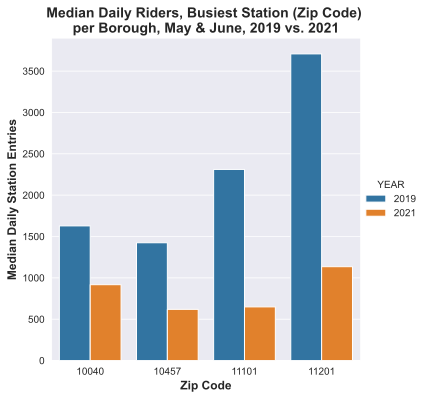

In [281]:
sns.set_style("darkgrid")
sns.catplot(x='ZIPCODE', y='NET_ENTRIES', hue='YEAR', data=busiest_top_stations_compare, kind='bar', ci=None)
plt.title('Median Daily Riders, Busiest Station (Zip Code) \nper Borough, May & June, 2019 vs. 2021', 
          fontdict={'weight': 'bold', 'fontsize': 14})
plt.xlabel("Zip Code", fontdict={'weight': 'bold', 'size': 12})
plt.ylabel("Median Daily Station Entries", fontdict={'weight': 'bold', 'size': 12});

In [318]:
# Create dataframe of relative % differences in ridership comparing the selected stations from 2019 to 2021

busiest_top_stations_relative = busiest_2019_top_stations.groupby('BOROUGH').sum().reset_index()
busiest_top_stations_relative['NET_ENTRIES'] = \
                    np.abs((busiest_2019_top_stations.groupby('BOROUGH').sum()['NET_ENTRIES'] -
                         compare_2021.groupby('BOROUGH').sum()['NET_ENTRIES']).values)
busiest_top_stations_relative['ZIPCODE'] = busiest_top_stations_relative['ZIPCODE'].astype('int')
busiest_top_stations_relative

,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR,YEAR
0,Bronx,805.0,1.0,10457,29767.0,38096.0,41432.0,50835.0,2019
1,Brooklyn,2573.0,1.0,11201,129248.0,176004.0,66937.0,74422.0,2019
2,Manhattan,710.5,1.0,10040,49677.0,56530.0,93651.0,126690.0,2019
3,Queens,1662.0,1.0,11101,75581.0,82636.0,73696.0,82534.0,2019


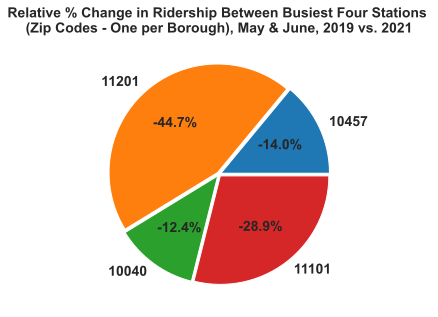

In [329]:
plt.figure(figsize=(5,5))
plt.pie(x=busiest_top_stations_relative['NET_ENTRIES'], 
        labels=busiest_top_stations_relative['ZIPCODE'],
        explode = [0.02]*4,
        autopct="-%.1f%%",
        textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Relative % Change in Ridership Between Busiest Four Stations \n(Zip Codes - One per Borough), May & June, 2019 vs. 2021',
          fontdict={'weight': 'bold', 'size': 14});

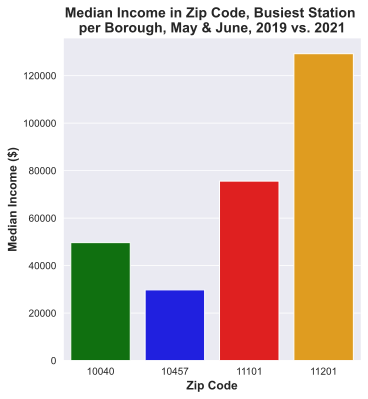

In [320]:
sns.set_style("darkgrid")
g = sns.catplot(x='ZIPCODE', y='MEDIAN_INCOME_ALL_ZIP', 
            data=busiest_top_stations_compare, kind='bar', 
            palette=['green', 'blue', 'red', 'orange'], ci=None)
plt.title('Median Income in Zip Code, Busiest Station \nper Borough, May & June, 2019 vs. 2021', 
          fontdict={'weight': 'bold', 'size': 14})
plt.xlabel("Zip Code", fontdict={'weight': 'bold', 'size': 12})
plt.ylabel("Median Income ($)", fontdict={'weight': 'bold', 'size': 12});

In [327]:
# Create dataframe of absolute % differences in ridership per selected station from 2019 to 2021

busiest_top_stations_absolute = busiest_2019_top_stations.groupby('BOROUGH').sum().reset_index()
busiest_top_stations_absolute['NET_ENTRIES'] = -100* \
           ((busiest_2019_top_stations.groupby('BOROUGH').sum()['NET_ENTRIES'] -
             compare_2021.groupby('BOROUGH').sum()['NET_ENTRIES']) / 
             busiest_2019_top_stations.groupby('BOROUGH').sum()['NET_ENTRIES']).values
busiest_top_stations_absolute['ZIPCODE'] = busiest_top_stations_absolute['ZIPCODE'].astype('int')
busiest_top_stations_absolute

,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR,YEAR
0,Bronx,-56.530899,1.0,10457,29767.0,38096.0,41432.0,50835.0,2019
1,Brooklyn,-69.390507,1.0,11201,129248.0,176004.0,66937.0,74422.0,2019
2,Manhattan,-43.642506,1.0,10040,49677.0,56530.0,93651.0,126690.0,2019
3,Queens,-71.916919,1.0,11101,75581.0,82636.0,73696.0,82534.0,2019


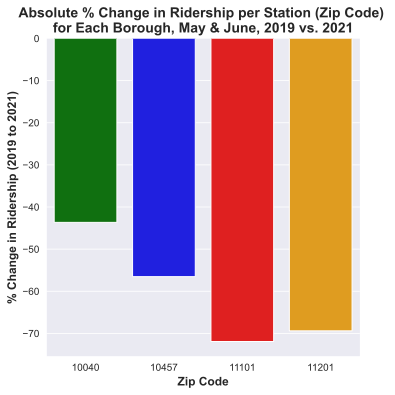

In [324]:
sns.set_style("darkgrid")
g = sns.catplot(x='ZIPCODE', y='NET_ENTRIES', 
            data=busiest_top_stations_absolute, kind='bar', 
            palette=['green', 'blue', 'red', 'orange'], ci=None)
plt.title('Absolute % Change in Ridership per Station (Zip Code) \nfor Each Borough, May & June, 2019 vs. 2021', 
          fontdict={'weight': 'bold', 'size': 14})
plt.xlabel("Zip Code", fontdict={'weight': 'bold', 'size': 12})
plt.ylabel("% Change in Ridership (2019 to 2021)", fontdict={'weight': 'bold', 'size': 12});